# Objectives
YWBAT
* explain how linear regression and logistic regression are related
* explain what is being searched for in gradient descent on a logistic regression model
* give an example of the cost function for logistic regression
* apply logistic regression in python
* gridsearchcv

# Outline
* Classification vs Regression - discuss
* import some libraries and the iris dataset
* discuss how linear/logistic regression are related
* make a logistic regression formula by hand that classifies datapoints
* apply sklearn logistic regression

# Classification vs Regression
things we've predicted
* housing price (regression)
    * in dollars
    * continuous value
    
Classification
* predicting a label (class)
    * example in the iris dataset
        * our X is going to be petal length, petal width, etc 
        * our y (target) is going to be the kind of flower (setosa, versicolor, viriginca)
        * one of the first steps is transforming our target to be numerical setosa=0, versicolor=1, viriginca=2
        * the numbers in our target have no meaning with each other

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
iris = load_iris()
data = iris.data
target = iris.target
columns = iris.feature_names

In [3]:
df = pd.DataFrame(data, columns=columns)
df['target'] = target 
df['target_names'] = [iris.target_names[i] for i in df.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


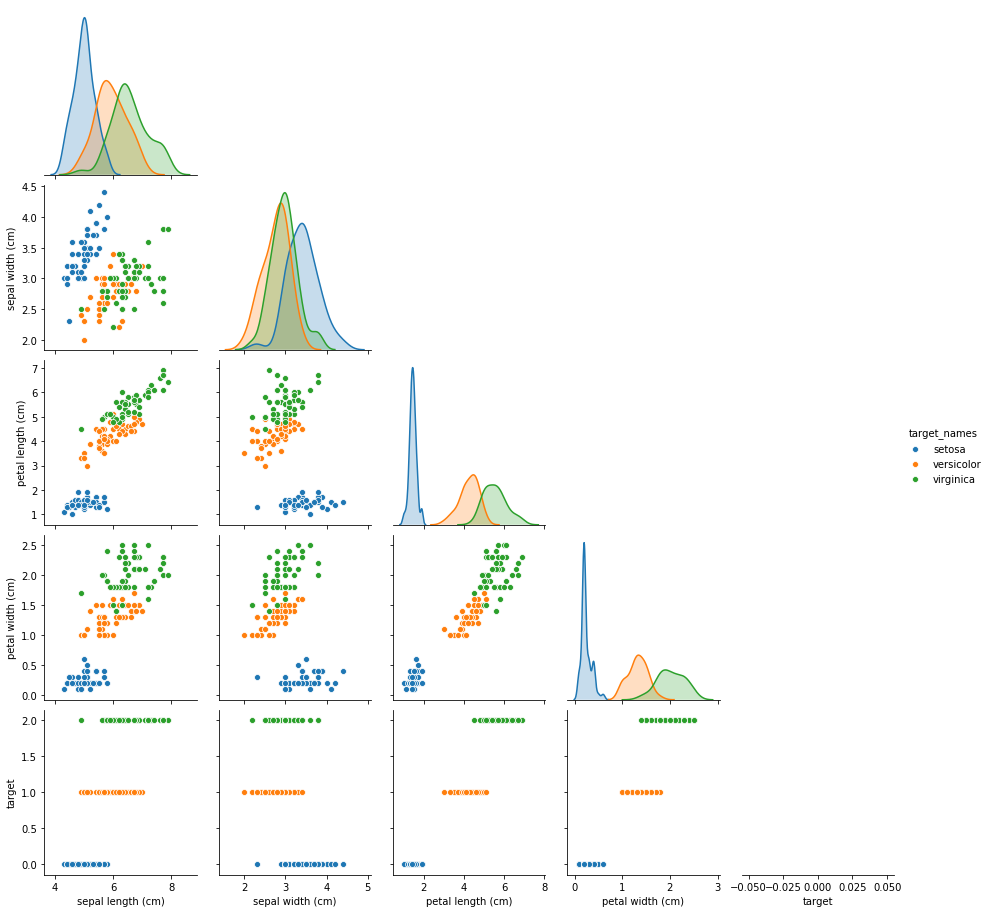

In [4]:
sns.pairplot(df, hue='target_names', corner=True)
plt.show()

# Logistic Regression
new equation, Sigmoid Function

$$ y = \frac{1}{1 + e^{-(b0+b1x1+...bnxn)}}$$

is this parametric or non parametric?
* parametric, because
    * we have beta coefficients
    * we are modeling a formula
    
* Sigmoid Function -> Transformation Functions
* abs -> makes things positive
* quadratic (x^2) -> makes things positive, but also squares them
* sigmoid -> squishes our linear regression between 0 and 1
* sigmoid is only used in binary classification

# let's take some data and make a sigmoid function

In [5]:
pl = df['petal length (cm)']

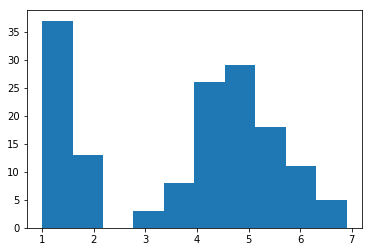

In [6]:
plt.hist(pl)
plt.show()

In [7]:
def sigmoid(arr, b0=0, b1=1):
    preds = 1/(1 + np.exp(-(b0 + b1*arr)))
    return preds

def get_labels(preds):
    labels = [1 if p >=0.5 else 0 for p in preds]
    return labels

In [8]:
target_preds = sigmoid(pl, b0=15, b1=-8) 
# what would be the best process for picking beta coefficients?
# gradient descent!
pred_labels = get_labels(target_preds)

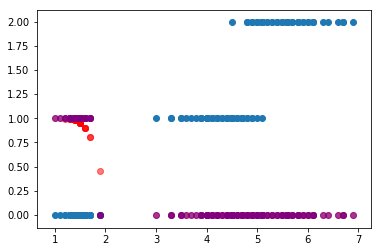

In [9]:
plt.scatter(df['petal length (cm)'], df['target'])
plt.scatter(pl, target_preds, c='r', alpha=0.3)
plt.scatter(pl, pred_labels, c='purple', alpha=0.7)
plt.show()

# How do we fix the binary part of this? 
We need to dummify our target

In [10]:
df_dummy = pd.get_dummies(df, columns=['target_names'])
df_dummy.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names_setosa,target_names_versicolor,target_names_virginica
0,5.1,3.5,1.4,0.2,0,1,0,0
1,4.9,3.0,1.4,0.2,0,1,0,0
2,4.7,3.2,1.3,0.2,0,1,0,0
3,4.6,3.1,1.5,0.2,0,1,0,0
4,5.0,3.6,1.4,0.2,0,1,0,0


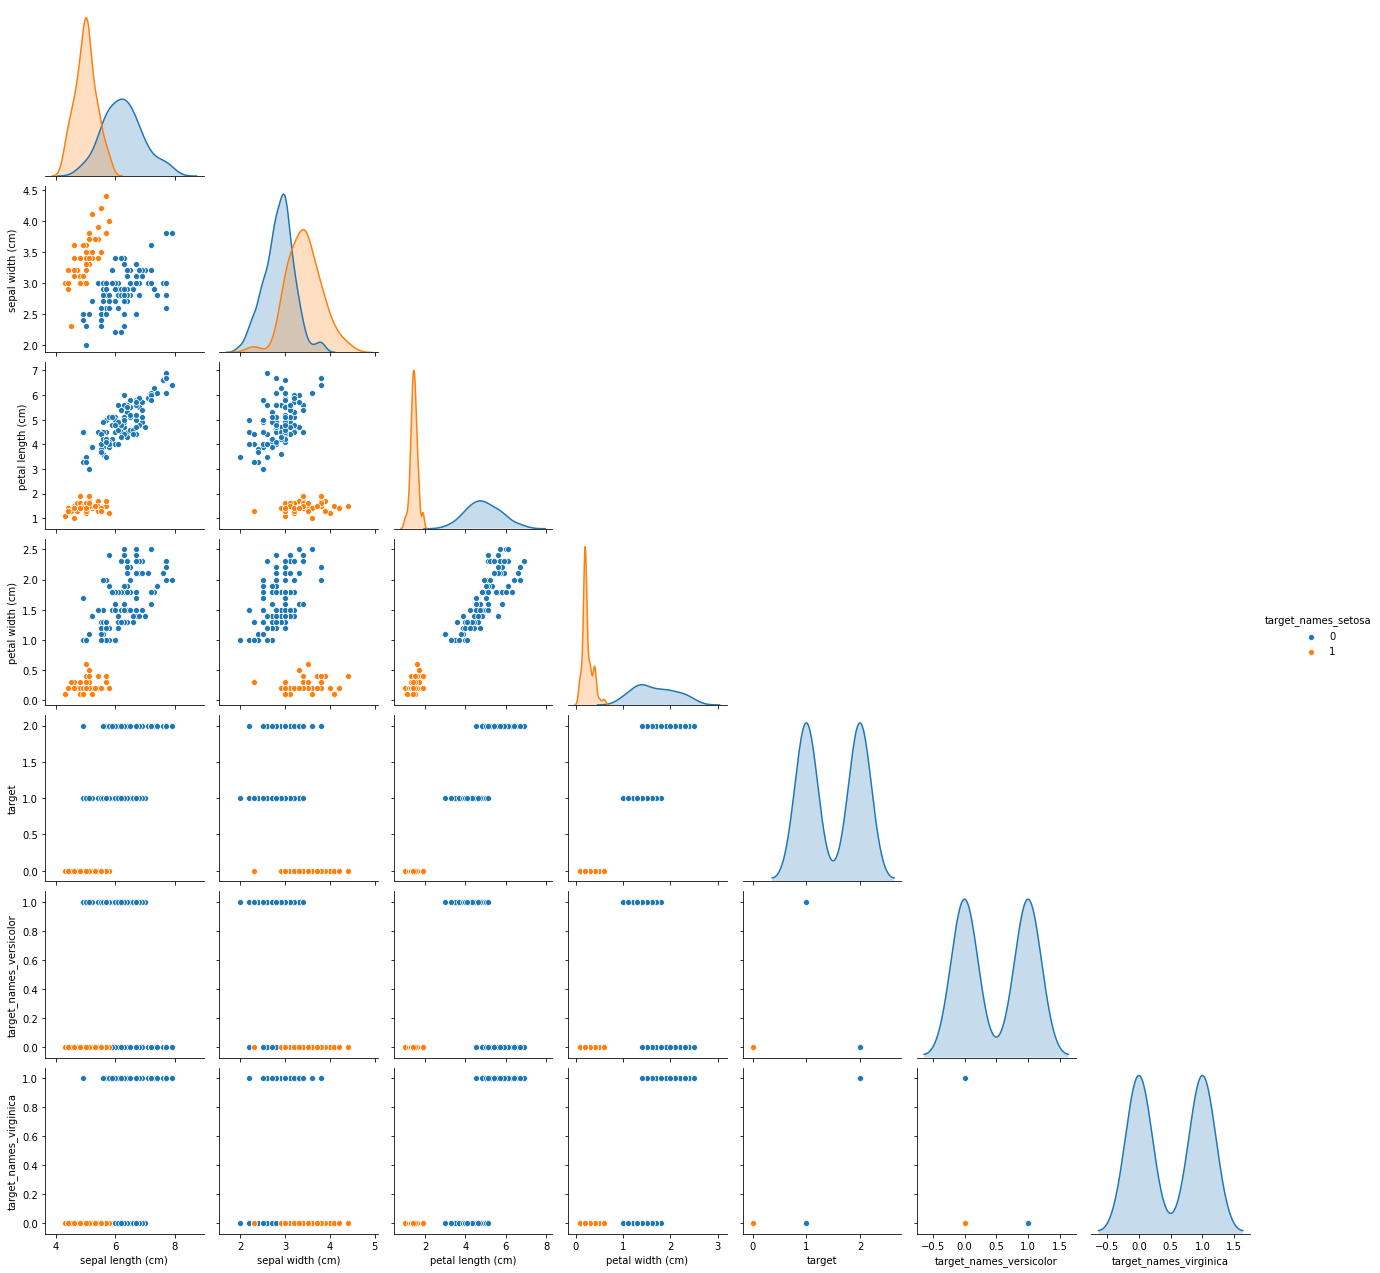

In [11]:
sns.pairplot(df_dummy, hue='target_names_setosa', corner=True)
plt.show()

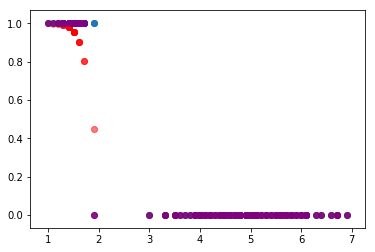

In [12]:
plt.scatter(df['petal length (cm)'], df_dummy['target_names_setosa'])
plt.scatter(pl, target_preds, c='r', alpha=0.3)
plt.scatter(pl, pred_labels, c='purple', alpha=0.7)
plt.show()

In [13]:
# build 3 models, train them and get predictions

In [14]:
df_dummy_train, df_dummy_test = train_test_split(df_dummy, test_size=0.30)

In [15]:
groups = [f'target_names_{i}' for i in iris.target_names]
groups

['target_names_setosa', 'target_names_versicolor', 'target_names_virginica']

In [16]:
model_groups = {}
for group in groups:
    d = {}
    X_train = df_dummy_train.drop(columns=groups)
    X_train = X_train.drop(columns=['target'])
    X_test = df_dummy_test.drop(columns=groups)
    X_test = X_test.drop(columns=['target'])
    y_train = df_dummy_train[group]
    y_test = df_dummy_train[group]
    model = LogisticRegression()
    model.fit(X_train, y_train)
    d['model'] = model
    model_groups[group] = d
model_groups

{'target_names_setosa': {'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)},
 'target_names_versicolor': {'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)},
 'target_names_virginica': {'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
   

In [17]:
random_point = X_test.sample(n=1)
random_point

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
120,6.9,3.2,5.7,2.3


In [18]:
def label_point(random_point):
    scores = []
    for group in model_groups.keys():
        score = model_groups[group]['model'].predict_proba(random_point)[0][1]
        scores.append(score)
    print(scores)
    print(sum(scores))
    print("after weighting")
    scores = [score/sum(scores) for score in scores]
    print(scores)
    print(sum(scores))
    label = np.argmax(scores)
    label_name = iris.target_names[label]
    return label_name

In [19]:
label_point(random_point)

[0.0002355359180152631, 0.2024900118876229, 0.9601588522908014]
1.1628844000964396
after weighting
[0.00020254456762489013, 0.1741273783282587, 0.8256700771041164]
1.0


'virginica'

In [20]:
labels = []
for i, row in X_test.iterrows():
    labels.append(label_point(row.values.reshape(1, -1)))
labels

[0.0002768636732017504, 0.21762957144462255, 0.9616670864060033]
1.1795735215238277
after weighting
[0.00023471506281701296, 0.1844985221128723, 0.8152667628243107]
1.0
[0.026024033777297655, 0.46897127151261503, 0.05582115726820232]
0.550816462558115
after weighting
[0.04724628900239512, 0.8514111385389743, 0.10134257245863053]
1.0
[0.02668849156268252, 0.4934272215187351, 0.045104395380159285]
0.5652201084615769
after weighting
[0.047217873467601125, 0.8729824260176295, 0.07979970051476935]
1.0
[0.9762257329379534, 0.2669989450569823, 6.33842995030252e-06]
1.243231016424886
after weighting
[0.7852327685205683, 0.21476213312693998, 5.098352491662982e-06]
0.9999999999999999
[0.0002355359180152631, 0.2024900118876229, 0.9601588522908014]
1.1628844000964396
after weighting
[0.00020254456762489013, 0.1741273783282587, 0.8256700771041164]
1.0
[0.0007208592351653004, 0.19920743757965056, 0.899659021997882]
1.099587318812698
after weighting
[0.0006555725251030205, 0.18116563748184084, 0.8181

['virginica',
 'versicolor',
 'versicolor',
 'setosa',
 'virginica',
 'virginica',
 'versicolor',
 'setosa',
 'setosa',
 'versicolor',
 'virginica',
 'virginica',
 'versicolor',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'versicolor',
 'versicolor',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'setosa',
 'setosa',
 'versicolor',
 'virginica',
 'versicolor',
 'virginica',
 'versicolor',
 'versicolor',
 'setosa',
 'virginica',
 'setosa',
 'setosa',
 'virginica',
 'versicolor',
 'virginica',
 'versicolor',
 'setosa',
 'versicolor',
 'setosa',
 'versicolor',
 'versicolor',
 'setosa']

# Log-loss
* cost function 
* RSS = (y - yhat)^2, but our y_hat is the sidmoig function
* RSS = (y - 1/(1 + e^-(b0 + ... + bnxn)))^2
* log(RSS) = log(all that stuff above), because it makes the derivative easier to calculate
* then you differentiate the logloss

# What did we learn? 
* how to use logistic regression for non binary targets
* learned the difference between classification and regression 
* how we get from linear regression to logistic regression
    * we put the linear regression equation into the sigmoid function
* dummify target for multiclass modeling
* logloss, why? cause it makes derivative easier 

# Day 2 - Evaluation Metrics

# Objectives
YWBAT
* list evaluation metrics
* create a confusion matrix
* use a confusion matrix to interpret and optimize a model
* optimize a model based on recall/precision/accuracy/etc
* Look at feature importance of classification models

In [21]:
df_dummy.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names_setosa,target_names_versicolor,target_names_virginica
0,5.1,3.5,1.4,0.2,0,1,0,0
1,4.9,3.0,1.4,0.2,0,1,0,0
2,4.7,3.2,1.3,0.2,0,1,0,0
3,4.6,3.1,1.5,0.2,0,1,0,0
4,5.0,3.6,1.4,0.2,0,1,0,0


# Goal
We want to build a logistic regression classifier that can properly classify versicolor and not veriscolor

In [23]:
df_versicolor = df_dummy.drop(columns=['target', 'target_names_setosa', 'target_names_virginica'])
df_versicolor.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names_versicolor
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Evaluation Metrics (Classifiers)
* Precision
* Recall
* ROC/AUC
* F1 Score
* Accuracy
* F2 Score
* F Beta Score


# Evaluation Metrics (Regression)
* RSS
* r2 Score
* AIC
* BIC

# Class Imbalance

In [26]:
df_versicolor['target_names_versicolor'].value_counts()

0    100
1     50
Name: target_names_versicolor, dtype: int64

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import precision_score, precision_recall_fscore_support, fbeta_score, f1_score 
from sklearn.metrics import make_scorer

from imblearn.over_sampling import SMOTE

In [30]:
df_train, df_test = train_test_split(df_versicolor, test_size=0.20, 
                                     stratify=df_versicolor['target_names_versicolor'])

In [31]:
df_train['target_names_versicolor'].value_counts()

0    80
1    40
Name: target_names_versicolor, dtype: int64

# SMOTE
only smote your training data 

# build a model on our iris

In [25]:
logreg = LogisticRegression()

In [35]:
X_train, y_train = df_train.drop(columns=['target_names_versicolor']), df_train['target_names_versicolor']

X_test, y_test = df_test.drop(columns=['target_names_versicolor']), df_test['target_names_versicolor']



In [36]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
# model.score() => accuracy score
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.7083333333333334, 0.7)

In [41]:
y_test_preds = logreg.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_preds)

In [ ]:
y_test_preds = logreg.predict(X_test)

In [76]:
def plot_confusion_matrix(y_test, y_test_preds):
    cm_test = confusion_matrix(y_test, y_test_preds)
    sns.heatmap(cm_test, cmap=sns.color_palette('Blues'), fmt='0.2g', annot=True)
    plt.title("Confusion Matrix\nTest Data")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Binary -> TP, TN, FP, FN language is used
# Multiclass -> Correct vs Incorrect (label by label)

* Accuracy: What did you get correct out of everything you attempted?
* Precision: Measuring your false positive rate, unless TP = 0. 
    * High Precision Score -> Low FP Rate
    * Low Precision Score -> High FP Rate or TP = 0
    * Business Cases
        * Should we declare bankruptcy?
        * Investing? Should I invest in this stock? 
        * Facial Recognition for a crime 
        * Cancer/Maybe not
        * Loan Approval
* Recall: Measures false negative rate, unless TP = 0
    * High Recall Score -> Low FN Rate
    * Low Recall Score -> High FN Rate or TP = 0 
    * Business Case (better safe than sorry)
        * Diagnosing COVID or contageous diseases
            * don't let someone walk out the door that is sick but they think they're ok
        * Cancer diagnosis
        * Crime
            * high chance of repeat offenders
                * high chance = intervention
* f1 Score
    * Harmonic Mean of the Precision and Recall

# let's say we want to minimize our FP rate

In [44]:
logreg.coef_ # these beta coefficients are meant to optimize accuracy

array([[-0.31459112, -1.95821454,  0.74993204, -1.17454753]])

In [45]:
from sklearn.metrics import classification_report

In [47]:
report = classification_report(y_test, y_test_preds)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        20
           1       0.57      0.40      0.47        10

    accuracy                           0.70        30
   macro avg       0.66      0.62      0.63        30
weighted avg       0.68      0.70      0.68        30



# SKlearn default optimizes to Accuracy, how can get it to optimize to precision?

In [48]:
logreg = LogisticRegression()

In [49]:
params = {"penalty": ['l1', 'l2'],
          "fit_intercept": [True, False],
          "C": [0.5, 1.0, 2.0]}

In [83]:
logreg_cv = GridSearchCV(logreg, param_grid=params, n_jobs=-1, 
                         cv=5, scoring=make_scorer(recall_score))

In [84]:
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.5, 1.0, 2.0], 'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(recall_score), verbose=0)

In [85]:
logreg_best = logreg_cv.best_estimator_

In [86]:
X_test.shape, y_test.shape

((30, 4), (30,))

In [87]:
y_test_preds_again = logreg_best.predict(X_test)

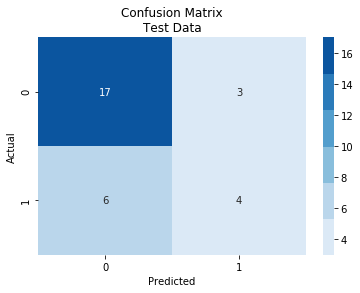

In [88]:
plot_confusion_matrix(y_test, y_test_preds_again)

# Let's do SMOTE
you have imbalanced data
1:10000 -> 1:0

in our case for the iris dataset
2:1

In [93]:
from collections import Counter

In [89]:
smote = SMOTE()

In [90]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [94]:
y_train_smote_counter = Counter(y_train_smote)

In [95]:
y_train.value_counts(), y_train_smote_counter

(0    80
 1    40
 Name: target_names_versicolor, dtype: int64, Counter({0: 80, 1: 80}))

In [107]:
logreg_cv = GridSearchCV(logreg, param_grid=params, n_jobs=-1, cv=5)

In [108]:
logreg_cv.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.5, 1.0, 2.0], 'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [109]:
logreg_smote_best = logreg_cv.best_estimator_

In [110]:
y_test_preds_again_again = logreg_smote_best.predict(X_test)

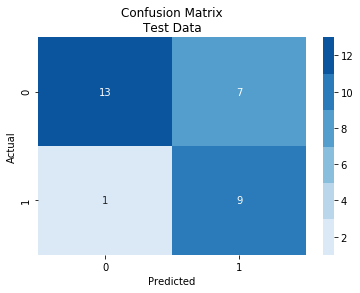

In [111]:
plot_confusion_matrix(y_test, y_test_preds_again_again)

In [112]:
logreg_smote_best.score(X_test, y_test)

0.7333333333333333

In [114]:
logreg_smote_best.intercept_, logreg_smote_best.coef_

(array([8.02701102]),
 array([[-0.32410178, -2.71527947,  1.16818783, -2.14571831]]))

# Feature Analysis

In [122]:
def plot_features(logreg, X_train=None):
    feature_importances = logreg.coef_[0]
    try:
        features = X_train.columns
    except:
        features = list(range(len(feature_importances)))
    plt.bar(features, feature_importances)
    plt.title("Feature Importance")
    plt.xticks(rotation=70)
    plt.show()

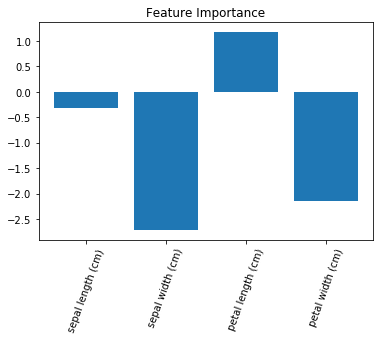

In [126]:
plot_features(logreg_smote_best, X_train)

# What did we learn? 
* How smote imputes values and how to use it for class imbalance 
* Learned that precision measures false positives and recall measures false negatives
* Accuracy measures the percentage of everything that was classified correctly
* That you can make your own scorer 
* How to read the heatmap to find the FP, TP, etc 
* Important things to consider when thinking about FP, FN, etc
* Language around multiclass modeling. Just use 'Correct vs Incorrect'